In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## 25℃下的电池实验数据

Cell_1_1 = pd.read_csv(r'.\experiment_data\Cell_1#_1.csv', encoding='gbk')
Cell_1_2 = pd.read_csv(r'.\experiment_data\Cell_1#_2.csv', encoding='gbk')
Cell_1_3 = pd.read_csv(r'.\experiment_data\Cell_1#_3.csv', encoding='gbk')
Cell_1_4 = pd.read_csv(r'.\experiment_data\Cell_1#_4.csv', encoding='gbk')
Cell_1_5 = pd.read_csv(r'.\experiment_data\Cell_1#_5.csv', encoding='gbk')
Cell_1_6 = pd.read_csv(r'.\experiment_data\Cell_1#_6.csv', encoding='gbk')

Cell_2_1 = pd.read_csv(r'.\experiment_data\Cell_2#_1.csv', encoding='gbk')
Cell_2_2 = pd.read_csv(r'.\experiment_data\Cell_2#_2.csv', encoding='gbk')
Cell_2_3 = pd.read_csv(r'.\experiment_data\Cell_2#_3.csv', encoding='gbk')
Cell_2_4 = pd.read_csv(r'.\experiment_data\Cell_2#_4.csv', encoding='gbk')
Cell_2_5 = pd.read_csv(r'.\experiment_data\Cell_2#_5.csv', encoding='gbk')
Cell_2_6 = pd.read_csv(r'.\experiment_data\Cell_2#_6.csv', encoding='gbk')

Cell_3_1 = pd.read_csv(r'.\experiment_data\Cell_3#_1.csv', encoding='gbk')
Cell_3_2 = pd.read_csv(r'.\experiment_data\Cell_3#_2.csv', encoding='gbk')
Cell_3_3 = pd.read_csv(r'.\experiment_data\Cell_3#_3.csv', encoding='gbk')
Cell_3_4 = pd.read_csv(r'.\experiment_data\Cell_3#_4.csv', encoding='gbk')
Cell_3_5 = pd.read_csv(r'.\experiment_data\Cell_3#_5.csv', encoding='gbk')
Cell_3_6 = pd.read_csv(r'.\experiment_data\Cell_3#_6.csv', encoding='gbk')
Cell_3_7 = pd.read_csv(r'.\experiment_data\Cell_3#_7.csv', encoding='gbk')

In [3]:
## 0℃下的电池实验数据

Cell_4_1 = pd.read_csv(r'.\experiment_data\Cell_4#_1.csv', encoding='gbk')
Cell_4_2 = pd.read_csv(r'.\experiment_data\Cell_4#_2.csv', encoding='gbk')

Cell_5_1 = pd.read_csv(r'.\experiment_data\Cell_5#_1.csv', encoding='gbk')
Cell_5_2 = pd.read_csv(r'.\experiment_data\Cell_5#_2.csv', encoding='gbk')

Cell_6_1 = pd.read_csv(r'.\experiment_data\Cell_6#_1.csv', encoding='gbk')
Cell_6_2 = pd.read_csv(r'.\experiment_data\Cell_6#_2.csv', encoding='gbk')

In [4]:
Cell_1 = pd.concat([Cell_1_1, Cell_1_2, Cell_1_3, Cell_1_4, Cell_1_5, Cell_1_6])
Cell_2 = pd.concat([Cell_2_1, Cell_2_2, Cell_2_3, Cell_2_4, Cell_2_5, Cell_2_6])
Cell_3 = pd.concat([Cell_3_1, Cell_3_2, Cell_3_3])
Cell_3_add = pd.concat([Cell_3_4, Cell_3_5, Cell_3_6, Cell_3_7])

In [5]:
## 从初始数据中获取弛豫电压数据

def func_relaxtion(original, original2=[]):
    '''
    函数目的：从原始数据中提取弛豫阶段数据
    original为原始数据；original2为接续的原始数据(如果没有的话则默认为[])
    注意：这个函数提取得到的弛豫阶段数据包括了电池电压、温度、容量等参数
    
    '''
    relax_data = []   #  relax_data为提取的弛豫阶段数据
    max_step = max(original['步次'])
    step_rest = np.arange(5, max_step, 4)
    for i in step_rest:
        relax_data.append(original[(original['步次']==i)])
    if(len(original2)):
        max_step2 = max(original2['步次'])
        step_rest2 = np.arange(5, max_step2, 4)
        for j in step_rest2:
            relax_data.append(original2[(original2['步次']==j)])
    return relax_data

def func_relax_voltage(relax_data):
    U_lst = []
    for i in range(len(relax_data)):
        U_lst.append(relax_data[i]['电压'].values)
    return U_lst

In [10]:
Cell_1_data = func_relaxtion(Cell_1)
Cell_1_vol_relax = func_relax_voltage(Cell_1_data)

Cell_2_data = func_relaxtion(Cell_2)
Cell_2_vol_relax = func_relax_voltage(Cell_2_data)

Cell_3_data = func_relaxtion(Cell_3, Cell_3_add); Cell_3_data = Cell_3_data[:50]
Cell_3_vol_relax = func_relax_voltage(Cell_3_data)

Cell_4_data = func_relaxtion(Cell_4_1, Cell_4_2); Cell_4_data = Cell_4_data[:30]
Cell_4_vol_relax = func_relax_voltage(Cell_4_data)

Cell_5_data = func_relaxtion(Cell_5_1, Cell_5_2); Cell_5_data = Cell_5_data[:30]
Cell_5_vol_relax = func_relax_voltage(Cell_5_data)

Cell_6_data = func_relaxtion(Cell_6_1, Cell_6_2); Cell_6_data = Cell_6_data[:30]
Cell_6_vol_relax = func_relax_voltage(Cell_6_data)

In [13]:
'''
这个对话框主要是用于保存读取的弛豫电压数据，方便其余代码直接读取数据
np.save('filename', a) ==> 保存成.npy文件;    b = np.load('filename.npy') ==> 读取.npy文件
np.savetxt('new_file.csv', csv_arr) ==> 保存成.csv文件;  np.loadtxt('new_file.csv')  ==> 读取.csv文件  
'''

np.save('.\experiment_data\Cell_1_vol_relax', Cell_1_vol_relax); np.save('.\experiment_data\Cell_2_vol_relax', Cell_2_vol_relax)
np.save('.\experiment_data\Cell_3_vol_relax', Cell_3_vol_relax)

np.save('.\experiment_data\Cell_4_vol_relax', Cell_4_vol_relax); np.save('.\experiment_data\Cell_5_vol_relax', Cell_5_vol_relax)
np.save('.\experiment_data\Cell_6_vol_relax', Cell_6_vol_relax)

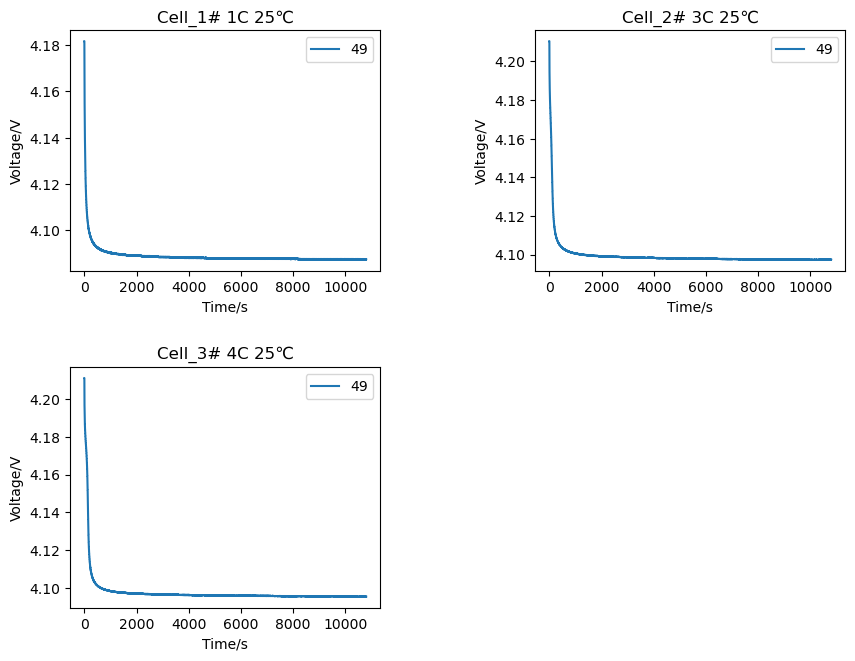

In [10]:
'''
    常温场景下(25℃)新补充实验的弛豫电压情况
'''

Time = np.arange(0, len(Cell_1_vol_relax[0])*0.1, 0.1)

plt.figure(figsize=(10,7.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.subplot(221)
plt.plot(Time, Cell_1_vol_relax[0], label='%d'%i)
plt.xlabel('Time/s')
plt.ylabel('Voltage/V')
plt.title('Cell_1# 1C 25℃')
plt.legend()

plt.subplot(222)
plt.plot(Time, Cell_2_vol_relax[0], label='%d'%i)
plt.xlabel('Time/s')
plt.ylabel('Voltage/V')
plt.title('Cell_2# 3C 25℃')   
plt.legend()

plt.subplot(223)
plt.plot(Time, Cell_3_vol_relax[0], label='%d'%i)
plt.xlabel('Time/s')
plt.ylabel('Voltage/V')
plt.title('Cell_3# 4C 25℃')   
plt.legend()

plt.show()

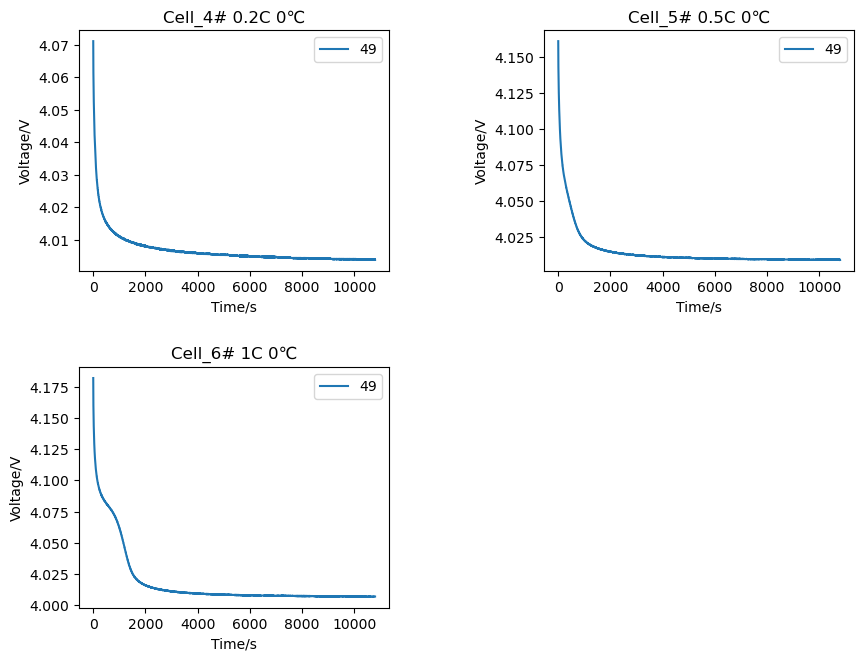

In [11]:
'''
    常温场景下(25℃)新补充实验的弛豫电压情况
'''

plt.figure(figsize=(10,7.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.subplot(221)
plt.plot(Cell_4_vol_relax[0], label='%d'%i)
plt.xlabel('Time/s')
plt.ylabel('Voltage/V')
plt.title('Cell_4# 0.2C 0℃')
plt.legend()

plt.subplot(222)
plt.plot(Cell_5_vol_relax[0], label='%d'%i)
plt.xlabel('Time/s')
plt.ylabel('Voltage/V')
plt.title('Cell_5# 0.5C 0℃')   
plt.legend()

plt.subplot(223)
plt.plot(Cell_6_vol_relax[0], label='%d'%i)
plt.xlabel('Time/s')
plt.ylabel('Voltage/V')
plt.title('Cell_6# 1C 0℃')   
plt.legend()

plt.show()